# Dataviz

Now that I have my data I can produce visualizations.

## Import a few modules

In [131]:
import sys
import numpy as np
import pandas as pd
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import geopy.distance
import glob
import os
import importlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pickleshare
from datetime import datetime

pd.options.mode.copy_on_write = True

sys.path.append("../my_modules")
import toolToReadGPX as ttrgpx

startingPoint_df = pd.DataFrame(columns=["name","startingDate","latitude","longitude"], 
                                index=np.arange(4))
startingPoint_df.iloc[:,0] = ["Origin","Park Girouard","Park Doyon","Ciele"]
startingPoint_df.iloc[:,1] = ["2017-09-14", "2020-06-18","2022-11-21", "2022-11-24"]
startingPoint_df.iloc[:,2] = [45.46604,  45.471895, 45.4776919, 45.489528]
startingPoint_df.iloc[:,3] = [-73.6194,  -73.613628, -73.62141,  -73.567539]

In [157]:
importlib.reload(ttrgpx)

# list of file names
path_csv_files = "../data/csv/"
list_csv_files  = glob.glob(path_csv_files+"*.csv")
list_csv_files.sort()

# list of panda DataFrame
list_run_df = []
for c, f in enumerate(list_csv_files):
    list_run_df.append(pd.read_csv(f)) 

# DataFrame with information about all gps traces
all_last_traces_info_df = ttrgpx.fun_create_df_from_list_df(list_run_df, list_csv_files, startingPoint_df)

# do a last cleaning
for c, single_trace_df in enumerate(list_run_df):
    #--> single_trace_df is equivalent to list_run_df[c]

    # check value 0, 1, 2, 3 of starting date:
    ref_lon = startingPoint_df["longitude"][all_last_traces_info_df.iloc[c,3]] 
    ref_lat = startingPoint_df["latitude"][all_last_traces_info_df.iloc[c,3]]
    cleaned_run_df = ttrgpx.fun_clean_trace_start_end(single_trace_df, ref_lon, ref_lat)

    # update the info all traces df
    if len(cleaned_run_df) < len(single_trace_df):
        print(c, "len before/after ",len(single_trace_df),"/",len(cleaned_run_df), all_last_traces_info_df["cumulative_distance"].iloc[c] / 1000, "--->", 
              cleaned_run_df["cumulative_distance"].iloc[-1]/1000)
        list_run_df[c] = cleaned_run_df.copy()
        
        # replace cumulative value
        all_last_traces_info_df.iloc[c,0] = cleaned_run_df["cumulative_distance"].iloc[-1]

18 between 5 and 30
0 len before/after  100 / 82 9.549687208533909 ---> 7.600975544106924
22 between 5 and 30
5 len before/after  100 / 78 7.935039441068704 ---> 5.957550656792738
5 between 5 and 30
22 len before/after  100 / 95 11.20588793086001 ---> 10.62639183060549
1 between 5 and 30
48 len before/after  100 / 99 10.123486291231776 ---> 10.007031699745244
11 between 5 and 30
149 len before/after  100 / 89 9.506180399484956 ---> 8.479374212518161
23 between 5 and 30
150 len before/after  100 / 77 12.243222588821144 ---> 9.669221648860868
21 between 5 and 30
152 len before/after  100 / 79 12.391654550302869 ---> 9.874174317203448
6 between 5 and 30
154 len before/after  100 / 94 8.304750568090617 ---> 7.695389691285196
29 between 5 and 30
155 len before/after  100 / 71 12.652870246363353 ---> 8.50282781599508
20 between 5 and 30
160 len before/after  100 / 80 11.916152715092318 ---> 9.423232465671083
8 between 5 and 30
161 len before/after  100 / 92 8.32493022937451 ---> 7.6534183453

# Show distances per year

In [143]:
importlib.reload(ttrgpx)

for aa in np.arange(2017, 2025):
    selected_runs  = all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa]
    mean_val = selected_runs.mean() / 1000 # all_last_traces_info_df["cumulative_distance"][all_last_traces_info_df.index.year == aa].mean() / 1000
    print("About {0:1.0f} social runs for year {1:1.0f} and an average of {2:02.2f}km per run.".format(len(selected_runs),aa, mean_val))

About 14 social runs for year 2017 and an average of 7.67km per run.
About 49 social runs for year 2018 and an average of 9.70km per run.
About 44 social runs for year 2019 and an average of 9.15km per run.
About 24 social runs for year 2020 and an average of 8.97km per run.
About 23 social runs for year 2021 and an average of 9.04km per run.
About 40 social runs for year 2022 and an average of 9.33km per run.
About 37 social runs for year 2023 and an average of 11.26km per run.
About 24 social runs for year 2024 and an average of 11.11km per run.


# Display all gps traces

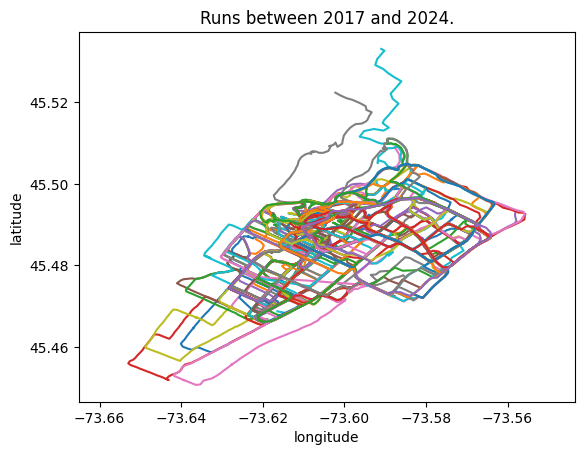

In [158]:
select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year >= 2017) &
(all_last_traces_info_df.index.year <= 2024)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"])
plt.title("Runs between 2017 and 2024.")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal")
#plt.show()
plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

# Show all the runs by distance over the year

<Axes: xlabel='time'>

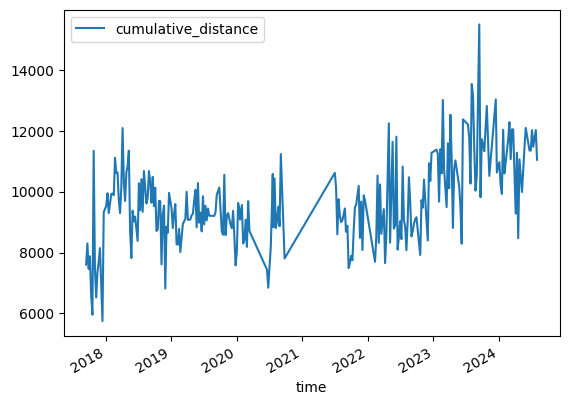

In [159]:
all_last_traces_info_df.plot.line(y="cumulative_distance")

# Overlay distances per run per year Vs day of the year

Text(0, 0.5, 'Run distance (km)')

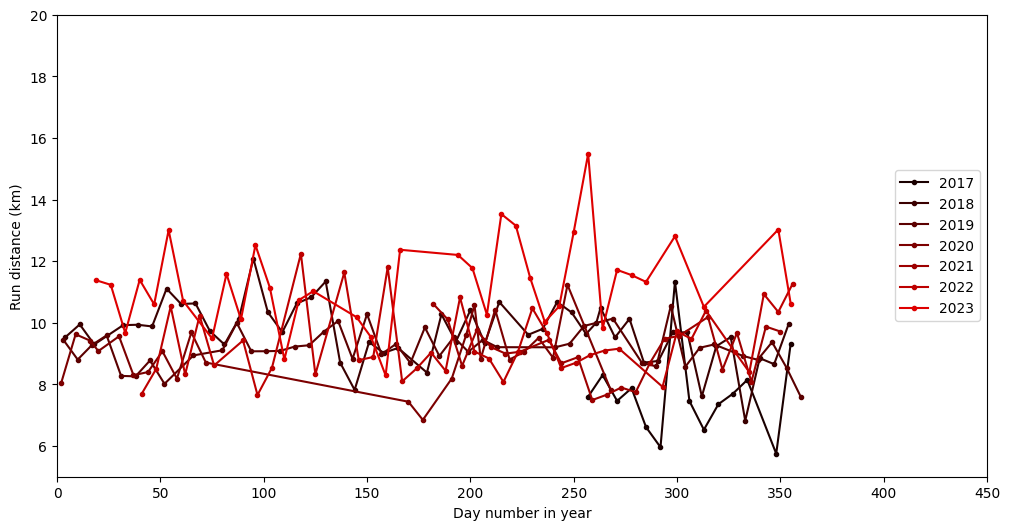

In [160]:
plt.figure(figsize=(12, 6))
vec_color = np.linspace(0.1,1,8)
for cc, aa in enumerate(np.arange(2017,2024)):
    sel_def   = all_last_traces_info_df[(all_last_traces_info_df.index.year == aa)] 
    sel_cumul = sel_def["cumulative_distance"].to_numpy() / 1000
    sel_index = sel_def["numberDay"].to_numpy()
    desired_array = [int(num_string) for num_string in sel_index]
    plt.plot(desired_array, sel_cumul,'.-',label=str(aa),color=[vec_color[cc],0,0])

plt.legend(loc=5)
plt.axis([0, 450, 5, 20])
plt.xlabel('Day number in year')
plt.ylabel('Run distance (km)')

# Answering questions

+ what is the longest run, when did it happen?
+ what is the average distance per year?
+ is there still some cleaning I can do? I can see at least two of my recorded runs are too small meaning my gps probably collapsed at those dates, so what are those dates?


In [162]:
index_longest_run = all_last_traces_info_df["cumulative_distance"].argmax()
one_long_run_df   = list_run_df[index_longest_run]

#one_long_run_df.plot(x="longitude", y="latitude")
#plt.scatter(startingPoint_df["longitude"][3],startingPoint_df["latitude"][3])

year   = all_last_traces_info_df.index[index_longest_run].year
month  = all_last_traces_info_df.index[index_longest_run].month 
day    = all_last_traces_info_df.index[index_longest_run].day
lenght = all_last_traces_info_df["cumulative_distance"].iloc[index_longest_run] / 1000

print("The longest did happen the Thursday {0:1.0f}-{1:1.0f}-{2:1.0f} and we ran {3:1.2f}km".format(year, month, day, lenght))

The longest did happen the Thursday 2023-9-14 and we ran 15.49km


# Display many gps traces in one graph

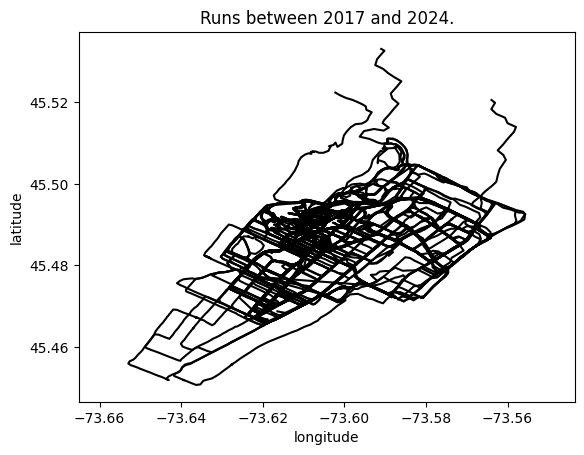

In [151]:
# This below
select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year >= 2017) &
(all_last_traces_info_df.index.year <= 2024)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],'k')

plt.title("Runs between 2017 and 2024.")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal")
#plt.show()
plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


# Display run by group of year

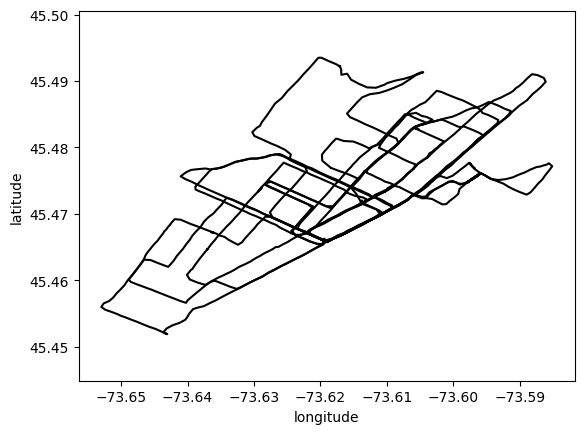

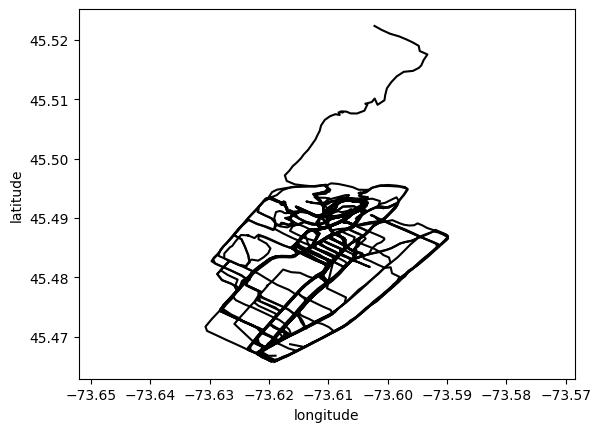

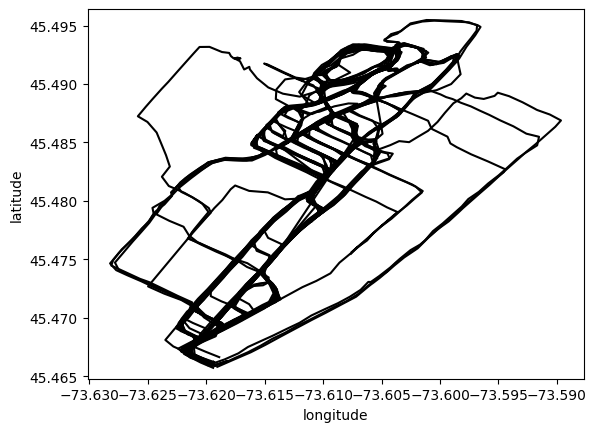

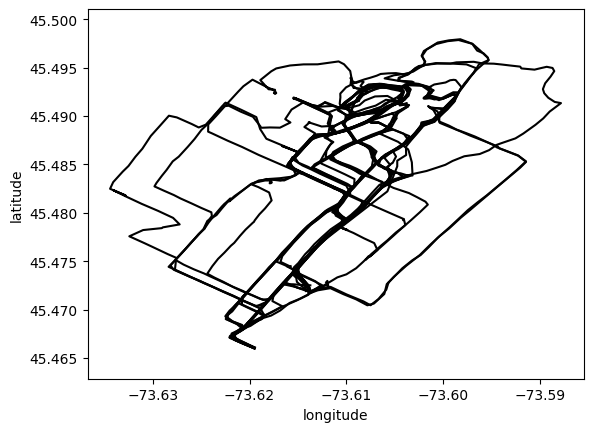

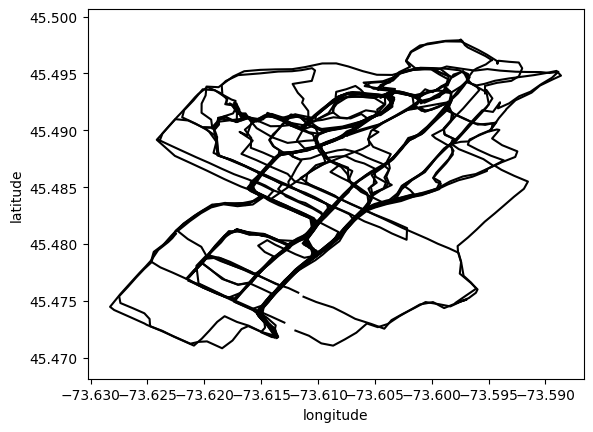

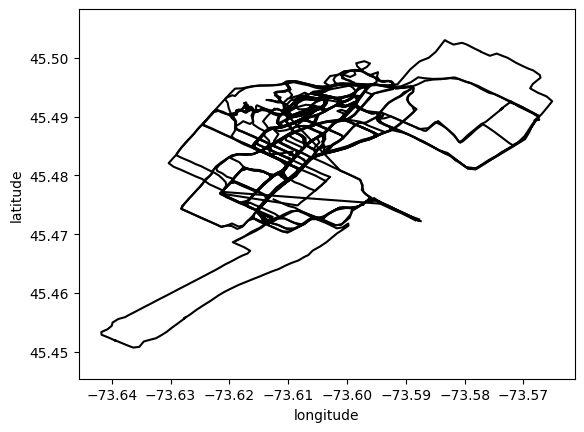

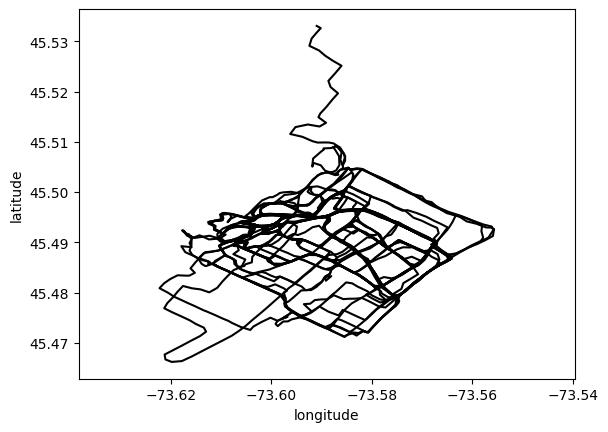

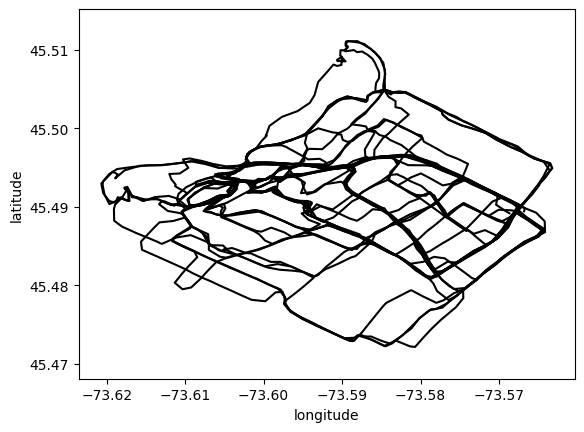

In [163]:
for a in np.arange(2017, 2025):
    plt.figure()
    # This below
    select_df = all_last_traces_info_df[(all_last_traces_info_df.index.year == a)]
    #(all_last_traces_info_df.index.year <= 2024)].copy()
    index_sel = np.array(select_df["indexNum"].tolist())
    
    # plot the traces
    for c, i in enumerate(index_sel):
        single_gps_trace_df = list_run_df[index_sel[c]]
        plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],'k')
    
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.axis("equal")
    #plt.show()
    #plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
    #            pad_inches=0.3, transparent=True)

# Display gps trace by season

(-73.65636525000001, -73.58171374999999, 45.4483809, 45.5258891)

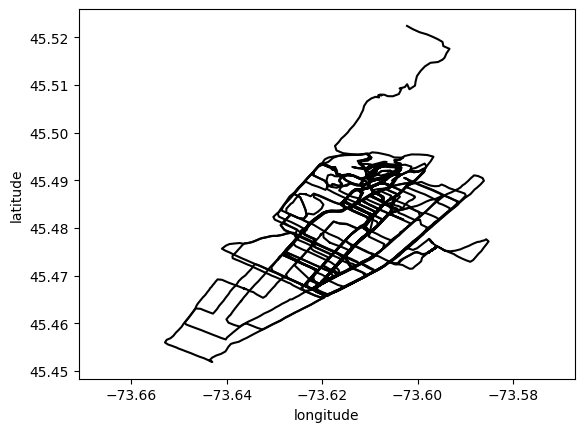

In [168]:
plt.figure()
# This below
date1 = pd.to_datetime("2018-09-10", format='%Y-%m-%d')
date2 = pd.to_datetime("2018-09-10", format='%Y-%m-%d')
select_df = all_last_traces_info_df[(all_last_traces_info_df.index >= date1) &
                                    (all_last_traces_info_df.index <= date2)].copy()
index_sel = np.array(select_df["indexNum"].tolist())

# plot the traces
for c, i in enumerate(index_sel):
    single_gps_trace_df = list_run_df[index_sel[c]]
    plt.plot(single_gps_trace_df["longitude"],single_gps_trace_df["latitude"],'k')

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.axis("equal")
#plt.show()
#plt.savefig("../tmp/output.jpg", facecolor='w', bbox_inches="tight",
#            pad_inches=0.3, transparent=True)

# Display gps trace by starting/ending point

# Idea of visualization

I could:
+ visualize run as polygon area
+ create group of runs an return convexhul
+ generate a date colum corresponding to the staring point